In [1]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import random

data = pd.read_csv('~/Desktop/methyl-vae/data-test/wine_train.csv')

# Predictor features (all columns except 'quality')
X = data.drop(columns=['quality'])

# Target feature ('quality' column)
y = data['quality']

In [10]:
#from ucimlrepo import fetch_ucirepo

# fetch dataset
#wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
#X = wine_quality.data.features
#y = wine_quality.data.targets

#random.seed(1) #seed is inconsequential

In [3]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,6.6,0.240,0.35,7.70,0.031,36.0,135.0,0.99380,3.19,0.37,10.5
1,8.3,0.280,0.48,2.10,0.093,6.0,12.0,0.99408,3.26,0.62,12.4
2,7.7,0.715,0.01,2.10,0.064,31.0,43.0,0.99371,3.41,0.57,11.8
3,5.2,0.370,0.33,1.20,0.028,13.0,81.0,0.99020,3.37,0.38,11.7
4,6.6,0.260,0.56,15.40,0.053,32.0,141.0,0.99810,3.11,0.49,9.3
...,...,...,...,...,...,...,...,...,...,...,...
5192,7.6,0.320,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2
5193,5.6,0.280,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7
5194,6.4,0.370,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5
5195,6.5,0.260,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5


In [4]:
y

0       5
1       7
2       6
3       6
4       5
       ..
5192    5
5193    7
5194    5
5195    5
5196    5
Name: quality, Length: 5197, dtype: int64

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
#from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Standardize the input data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/Users/tyronemariano/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [6]:
from sklearn.decomposition import PCA
import pandas as pd

# Load the Wine dataset
#wine_data = load_wine()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create DataFrame with principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add target class to the DataFrame
principal_df['target'] = y

# Display the DataFrame
principal_df


,PC1,PC2,target
0,1.411246,-0.560914,5
1,-2.390616,-0.512137,7
2,-2.648557,-1.109949,6
3,-0.445566,-2.839953,6
4,1.800617,1.992254,5
...,...,...,...
5192,1.906763,2.880081,5
5193,1.309959,-1.440512,7
5194,1.065453,0.661046,5
5195,2.053914,0.790291,5


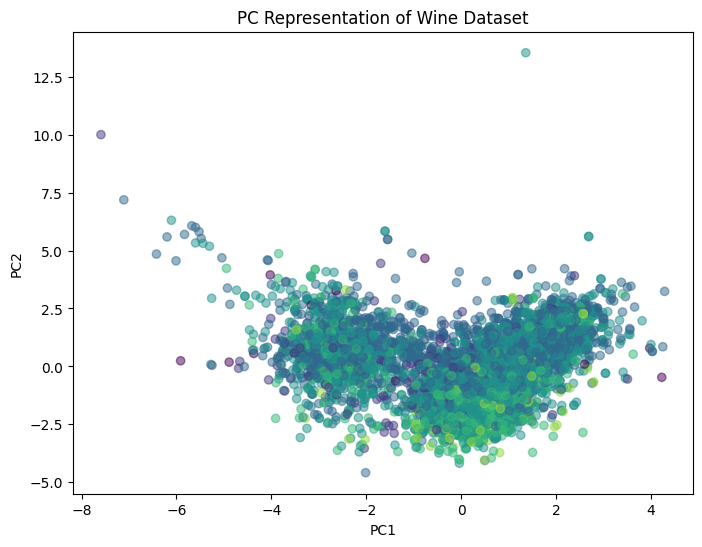

In [7]:
import matplotlib.pyplot as plt

# Plot encoded data
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['target'], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC Representation of Wine Dataset')
plt.show()

In [8]:
principal_df

,PC1,PC2,target
0,1.411246,-0.560914,5
1,-2.390616,-0.512137,7
2,-2.648557,-1.109949,6
3,-0.445566,-2.839953,6
4,1.800617,1.992254,5
...,...,...,...
5192,1.906763,2.880081,5
5193,1.309959,-1.440512,7
5194,1.065453,0.661046,5
5195,2.053914,0.790291,5
